# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# read the dataset

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Corona_NLP_train.csv', encoding='latin1')

In [4]:
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [15]:
dataset['OriginalTweet'][41156]

"@TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. Up to you whethe"

In [3]:
import re
texts=[]
for i in range(0,len(dataset)):
  text = re.sub('[^a-zA-Z]' , ' ', dataset['OriginalTweet'][i])
  text = text.lower()
  text = text.split()
  x = len(text) if text.count('https') ==0  else text.index('https')
  text = text[: x ]
  text = [t for t in text if not t=='https']
  text = ' '.join(text)
  texts.append(text)


In [33]:
len(texts)

41157

In [35]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [4]:
from gensim.models import Word2Vec


In [6]:
sentences = [line.split() for line in texts]

w2v = Word2Vec(
    sentences,
    vector_size=100,   # قبلاً size
    window=5,
    workers=4,
    epochs=10,         # قبلاً iter
    min_count=5
)

In [9]:
len(sentences)

41157

In [7]:
print(sentences[20:25])

[['with', 'nations', 'inficted', 'with', 'covid', 'the', 'world', 'must', 'not', 'play', 'fair', 'with', 'china', 'goverments', 'must', 'demand', 'china', 'adopts', 'new', 'guilde', 'lines', 'on', 'food', 'safty', 'the', 'chinese', 'goverment', 'is', 'guilty', 'of', 'being', 'irosponcible', 'with', 'life', 'on', 'a', 'global', 'scale'], [], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 'adult', 'cinema', 'hotmovies', 'iptvnew', 'iptv', 'adult'], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 

In [22]:
words = w2v.wv.index_to_key           # این یک list است
words

['the',
 'to',
 'and',
 'of',
 'covid',
 'a',
 'in',
 'coronavirus',
 'for',
 'is',
 'are',
 'i',
 'you',
 'on',
 's',
 'this',
 'prices',
 'at',
 'it',
 'food',
 'supermarket',
 'we',
 'store',
 'that',
 'with',
 'grocery',
 'have',
 'as',
 'be',
 'people',
 't',
 'from',
 'amp',
 'all',
 'can',
 'consumer',
 'your',
 'not',
 'will',
 'they',
 'my',
 'our',
 'up',
 'out',
 'has',
 'or',
 'by',
 'more',
 'but',
 'shopping',
 'if',
 'online',
 'how',
 'their',
 'during',
 'pandemic',
 'so',
 'now',
 'no',
 'what',
 'get',
 'about',
 'who',
 'need',
 'workers',
 'panic',
 'just',
 'there',
 'us',
 'do',
 'like',
 'time',
 'sanitizer',
 'home',
 'was',
 'an',
 'demand',
 'go',
 'when',
 'some',
 'help',
 'hand',
 'stock',
 'don',
 're',
 'going',
 'one',
 'm',
 'me',
 'here',
 'due',
 'buying',
 'been',
 'oil',
 'new',
 'crisis',
 'please',
 'work',
 'them',
 'after',
 'other',
 'toilet',
 'because',
 'only',
 'these',
 'should',
 'toiletpaper',
 'than',
 'paper',
 'today',
 'over',
 'sta

In [23]:
key2idx = w2v.wv.key_to_index         # این یک dict است
key2idx

{'the': 0,
 'to': 1,
 'and': 2,
 'of': 3,
 'covid': 4,
 'a': 5,
 'in': 6,
 'coronavirus': 7,
 'for': 8,
 'is': 9,
 'are': 10,
 'i': 11,
 'you': 12,
 'on': 13,
 's': 14,
 'this': 15,
 'prices': 16,
 'at': 17,
 'it': 18,
 'food': 19,
 'supermarket': 20,
 'we': 21,
 'store': 22,
 'that': 23,
 'with': 24,
 'grocery': 25,
 'have': 26,
 'as': 27,
 'be': 28,
 'people': 29,
 't': 30,
 'from': 31,
 'amp': 32,
 'all': 33,
 'can': 34,
 'consumer': 35,
 'your': 36,
 'not': 37,
 'will': 38,
 'they': 39,
 'my': 40,
 'our': 41,
 'up': 42,
 'out': 43,
 'has': 44,
 'or': 45,
 'by': 46,
 'more': 47,
 'but': 48,
 'shopping': 49,
 'if': 50,
 'online': 51,
 'how': 52,
 'their': 53,
 'during': 54,
 'pandemic': 55,
 'so': 56,
 'now': 57,
 'no': 58,
 'what': 59,
 'get': 60,
 'about': 61,
 'who': 62,
 'need': 63,
 'workers': 64,
 'panic': 65,
 'just': 66,
 'there': 67,
 'us': 68,
 'do': 69,
 'like': 70,
 'time': 71,
 'sanitizer': 72,
 'home': 73,
 'was': 74,
 'an': 75,
 'demand': 76,
 'go': 77,
 'when': 78,
 '

In [25]:
len_vocab = len(w2v.wv)
len_vocab

10630

In [26]:
vec = w2v.wv['corona']                # ndarray با طول vector_size
vec

array([-0.35494986, -0.07900543, -0.98589087,  0.48136225,  0.13406835,
       -0.3217463 ,  0.3771734 ,  0.38002253, -0.97131807,  1.2803533 ,
        1.4671609 , -1.0400568 ,  1.4142159 , -0.37072635,  0.38353842,
       -0.61278903,  1.2795414 ,  0.9338863 , -1.525316  , -2.1161017 ,
        1.2261024 , -0.569055  ,  1.4297378 ,  0.3853076 , -0.7273823 ,
        0.4487197 , -0.7401641 ,  0.44818345, -1.4649842 ,  0.92996866,
        0.42448607,  0.93412733,  0.89675915, -1.0927073 ,  0.18179046,
        0.6508187 , -0.02061513, -1.797664  ,  0.35531032,  1.3607606 ,
        0.38565227,  0.13020746, -1.2262751 ,  0.29046932,  0.7488722 ,
        0.56654257,  1.9296633 ,  1.7637261 ,  1.5687275 , -0.37121695,
        0.40885726, -0.71973747,  2.152658  , -1.5247374 , -0.17138326,
        1.2805681 ,  0.58123434,  0.19497536, -0.22896332,  0.12880863,
        1.8180301 , -1.1828269 ,  0.5364848 ,  0.39992514,  1.0277531 ,
       -0.6918112 ,  0.64640117,  2.4159606 , -0.25442877,  1.04

In [19]:
count_python = w2v.wv.get_vecattr('corona', 'count')
count_python

685

In [20]:
top10 = w2v.wv.index_to_key[:10]
top10

['the', 'to', 'and', 'of', 'covid', 'a', 'in', 'coronavirus', 'for', 'is']

In [27]:
w2v.wv.similarity('vladimir', 'putin')

0.8281888

In [28]:
w2v.wv.similarity('vladimir', 'modi')

0.6818961

In [29]:
print(w2v.wv.most_similar('pay'))

[('paying', 0.6993633508682251), ('paid', 0.6892662048339844), ('wages', 0.631721556186676), ('raise', 0.6094333529472351), ('bills', 0.6070789098739624), ('rent', 0.5833624005317688), ('charge', 0.5730659365653992), ('benefits', 0.5701203942298889), ('cancel', 0.5610544085502625), ('leave', 0.5460206866264343)]


In [30]:
print(w2v.wv.most_similar('covid'))

[('coronavirus', 0.6117319464683533), ('virus', 0.5427936315536499), ('corona', 0.49051085114479065), ('disease', 0.4470160901546478), ('epidemic', 0.42434900999069214), ('coronacrisis', 0.4223967492580414), ('workingfromhome', 0.41923266649246216), ('flattenthecurve', 0.41733986139297485), ('coronaviruschallenge', 0.4139276146888733), ('stayathome', 0.41327160596847534)]


In [31]:
print(w2v.wv.most_similar('india'))

[('nigeria', 0.7439843416213989), ('pakistan', 0.7109823822975159), ('petrolprice', 0.6531913876533508), ('amitshah', 0.649673581123352), ('kenya', 0.6372673511505127), ('irvpaswan', 0.6351872682571411), ('iran', 0.6319271922111511), ('delhi', 0.6208745837211609), ('pmoindia', 0.6188983917236328), ('drharshvardhan', 0.6185029149055481)]


In [32]:
print(w2v.wv.most_similar(positive=['russian', 'russia'], negative=['arab']))

[('putin', 0.7615365386009216), ('saudi', 0.7421016693115234), ('arabia', 0.7325637936592102), ('trump', 0.6989660263061523), ('opec', 0.675817608833313), ('saudis', 0.6248219609260559), ('donald', 0.6189418435096741), ('agreed', 0.5882402062416077), ('president', 0.5829069018363953), ('mbs', 0.5810130834579468)]


In [33]:
w2v.wv.doesnt_match(['grocery', 'covid', 'coronavirus'])


'grocery'

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



In [37]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words is None:
        if sample > 0:
            words = np.random.choice(model.wv.index_to_key, sample)
        else:
            words = model.wv.index_to_key

    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)


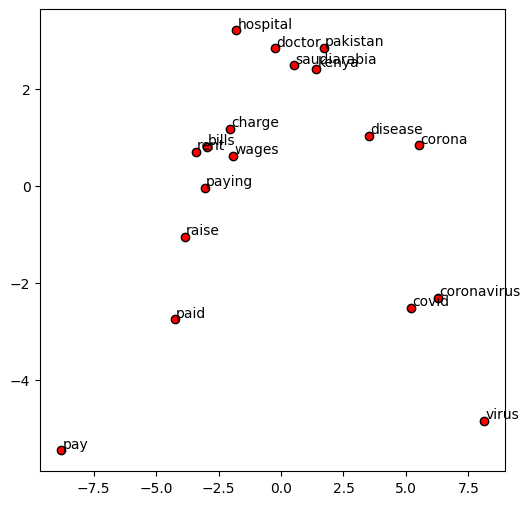

In [38]:
display_pca_scatterplot(w2v,['coronavirus', 'covid', 'virus', 'corona','disease', 'saudiarabia',  'doctor', 'hospital', 'pakistan', 'kenya',
                             'pay', 'paying', 'paid', 'wages', 'raise', 'bills', 'rent', 'charge']  )